In [1]:
# visualize GMET outputs

import numpy as np
import matplotlib.pyplot as plt
import imageio, os, glob

In [2]:

data1 = np.load('./Andy_test_case1/output_20170201-20170215.npz')
data2 = np.load('./Andy_test_case1/output_20170201-20170215_GMETstyle_error.npz')

/var/folders/pf/n30tfn0j0n93dr81jm369hyc0000gp/T/ipykernel_23474/2671755340.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


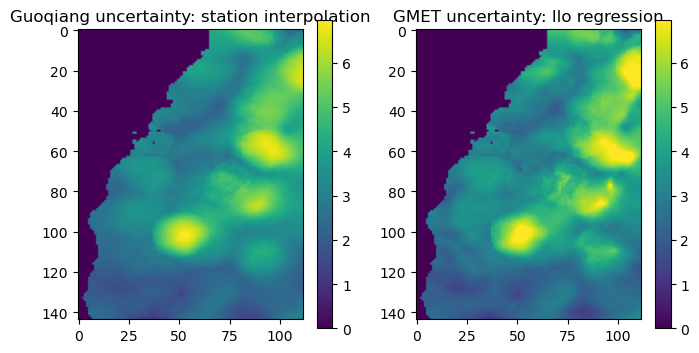

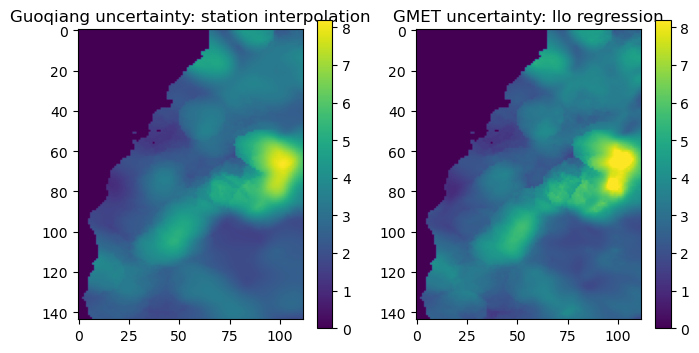

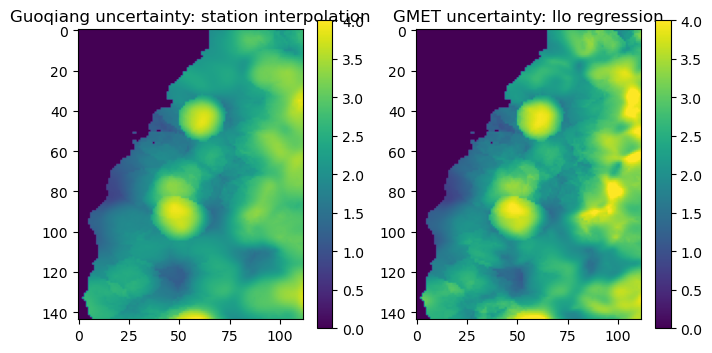

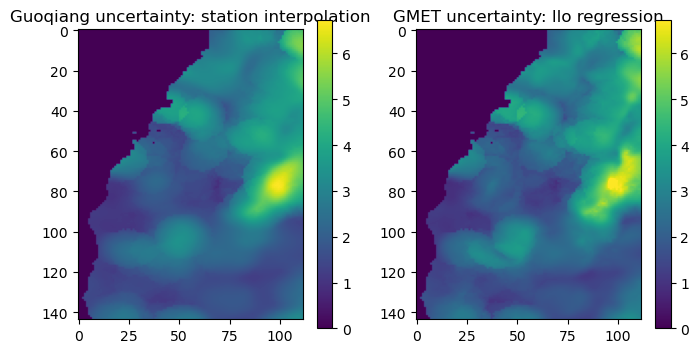

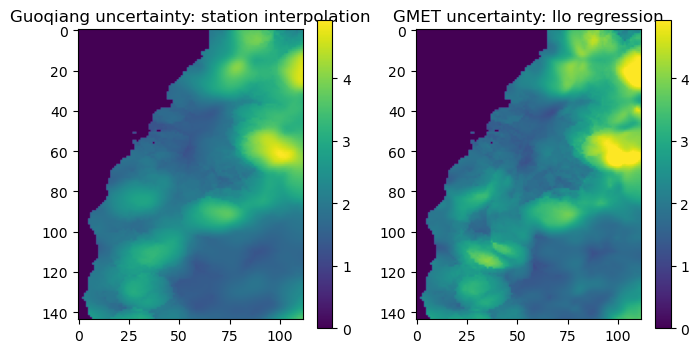

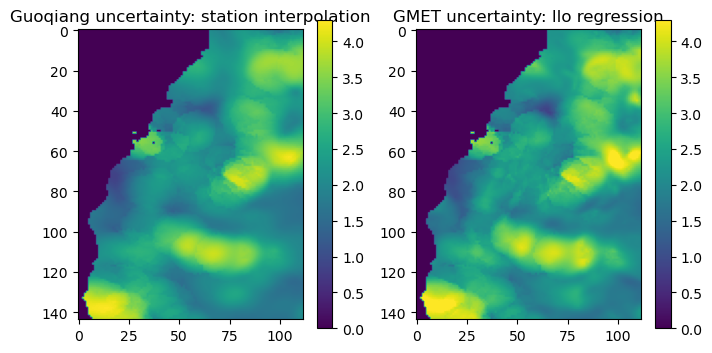

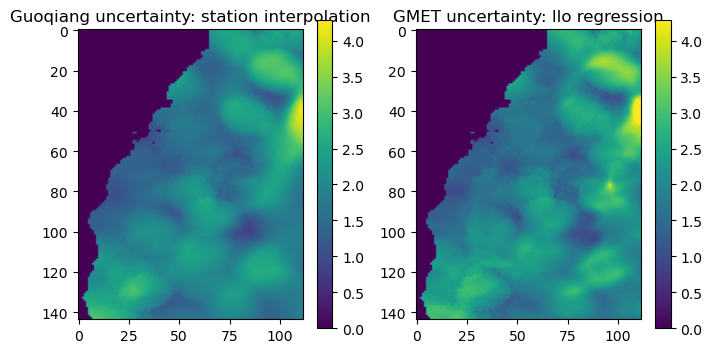

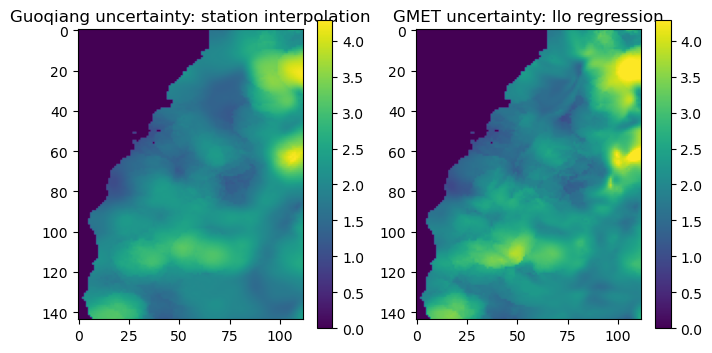

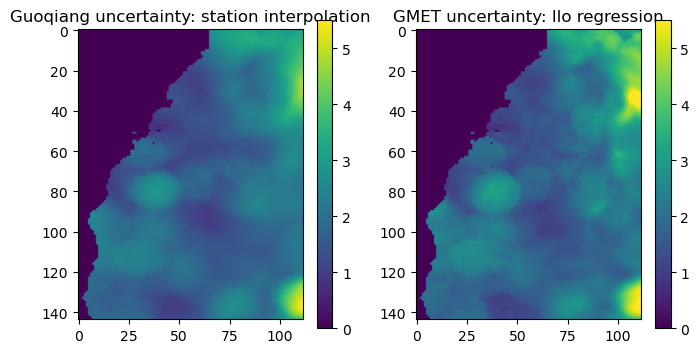

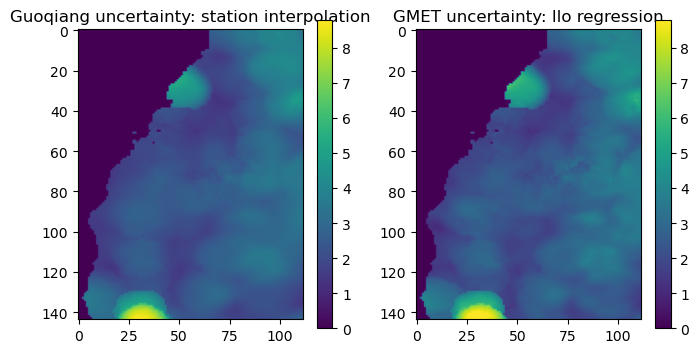

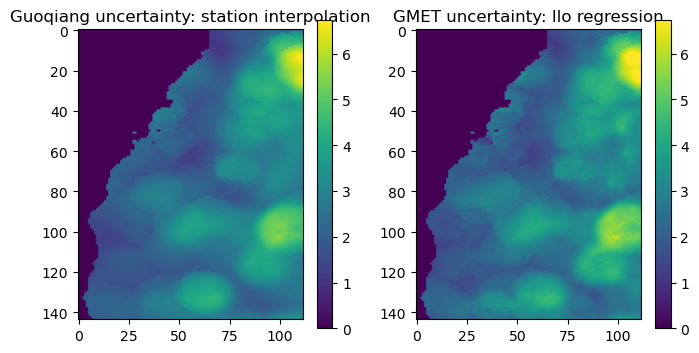

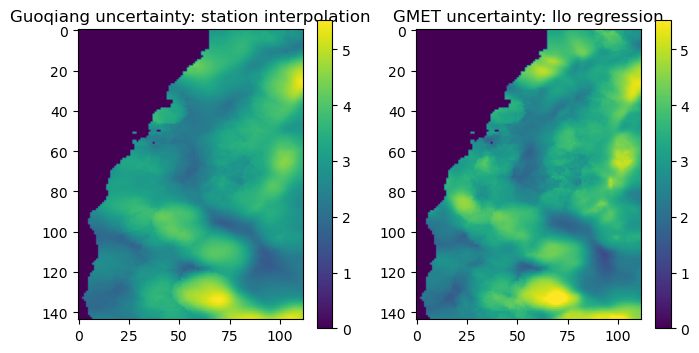

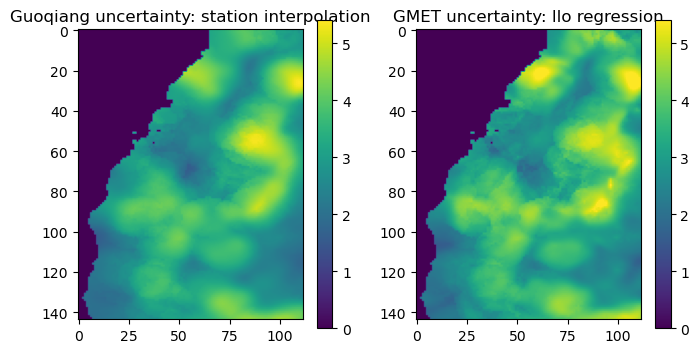

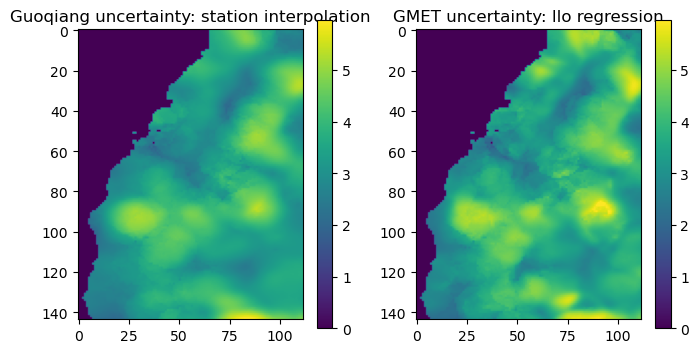

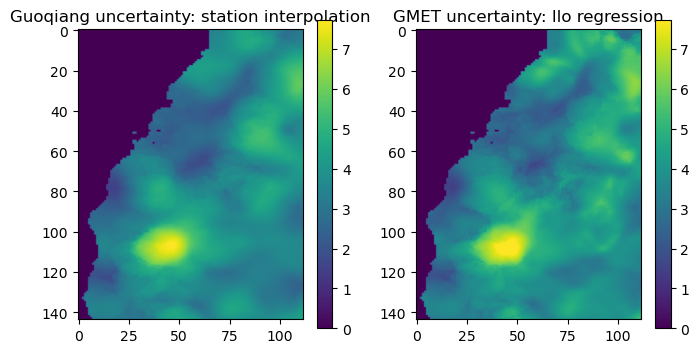

In [7]:


varname = 'trange_err'
files = []
for t in range(15):

    dplot = ['', '']
    dplot[0] = data1[varname][:,:,t]
    dplot[1] = data2[varname][:,:,t]
    vmin = dplot[0].min()
    vmax = dplot[0].max()

    fig, axs = plt.subplots(1, 2,figsize=[8,4])
    titles = ['Guoqiang uncertainty: station interpolation', 'GMET uncertainty: llo regression']

    for i in range(2):
        p = axs[i].imshow(dplot[i], vmin=vmin, vmax=vmax)
        axs[i].set_title(titles[i])
        fig.colorbar(p, ax=axs[i])

    plt.savefig(f'{varname}{t}.png')
    files.append(f'{varname}{t}.png')
    
# Build GIF
with imageio.get_writer(f'{varname}.gif', mode='I', fps=1) as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

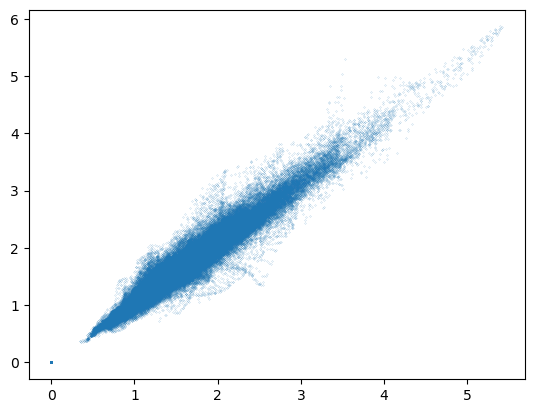

In [4]:
plt.scatter(data1[varname].flatten(), data2[varname].flatten(), 0.01)